### Kaggle Competition | Titanic Machine Learning from Disaster

>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.  This sensational tragedy shocked the international community and led to better safety regulations for ships.

>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.  Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

>In this contest, we ask you to complete the analysis of what sorts of people were likely to survive.  In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

>This Kaggle Getting Started Competition provides an ideal starting place for people who may not have a lot of experience in data science and machine learning."

From the competition [homepage](http://www.kaggle.com/c/titanic-gettingStarted).


### Goal for this Notebook:
Show a simple example of an analysis of the Titanic disaster in Python using a full complement of PyData utilities. This is aimed for those looking to get into the field or those who are already in the field and looking to see an example of an analysis done with Python.

#### This Notebook will show basic examples of: 
#### Data Handling
*   Importing Data with Pandas
*   Cleaning Data
*   Exploring Data through Visualizations with Matplotlib

#### Data Analysis
*    Supervised Machine learning Techniques:
    +   Logit Regression Model 
    +   Plotting results
    +   Support Vector Machine (SVM) using 3 kernels
    +   Basic Random Forest
    +   Plotting results

#### Valuation of the Analysis
*   K-folds cross validation to valuate results locally
*   Output the results from the IPython Notebook to Kaggle



#### Required Libraries:
* [NumPy](http://www.numpy.org/)
* [IPython](http://ipython.org/)
* [Pandas](http://pandas.pydata.org/)
* [SciKit-Learn](http://scikit-learn.org/stable/)
* [SciPy](http://www.scipy.org/)
* [StatsModels](http://statsmodels.sourceforge.net/)
* [Patsy](http://patsy.readthedocs.org/en/latest/)
* [Matplotlib](http://matplotlib.org/)

***To run this notebook interactively, get it from my Github [here](https://github.com/agconti/kaggle-titanic). The competition's website is located on [Kaggle.com](http://www.kaggle.com/c/titanic-gettingStarted).***

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn import datasets, svm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Handling
#### Let's read our data in using pandas:

In [2]:
df = pd.read_csv("data/titanic/train.csv") 

Show an overview of our data: 

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Lester, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Exploration du dataframe 
- Regarder les premières lignes du dataframe
- Regarder un résumé du dataframe avec df.describe(include='all')
- Combien y a t il de lignes ? 
- Y a t il des colonnes avec des valeurs manquantes ?
- Quelles sont les variables numériques, catégorielles, d'identifiant ? 

In [5]:
len(df['Ticket'].drop_duplicates())

681

# Sélection des colonnes
* A votre avis, quelles colonnes peut-on supprimer pour la construction du dataset d'entrainement ? Pourquoi ?
* Ecrire une fonction `filter_columns` qui prend en entrée le dataframe brut, et supprime les colonnes inutiles 

In [6]:
def filter_columns(df):
    df_filtered = df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
    return df_filtered

# Gestion des valeurs manquantes
* La variable `age` contient des valeurs manquantes, comment proposez vous des les gérer ? 
* ecrire une fonction `manage_nan` qui prend en entrée le dataframe et applique la solution proposée

In [7]:
def manage_nan(df):
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df = df.dropna(subset=['Embarked'])
    return df


Ecrire maintenant une fonction clean_data, qui applique à la suite les deux fonctions précédémment créées

In [8]:
def clean_data(df):
    df = df.copy()
    df = filter_columns(df)
    df = manage_nan(df)
    return df

In [9]:
df = pd.read_csv("data/titanic/train.csv") 
df_cleaned = clean_data(df)

In [10]:
df_cleaned.shape

(889, 8)

# Un peu de pandas pour jouer avec les données ...
Effectuer des aggrégations pour regarder :
* La moyenne de survie agrégée par classe, par sexe, par sexe + classe (avec un groupby)
* La moyenne de survie croisée, avec en ligne les classes, en colonnes les différentes modalités de la colonne sex : 'M' et 'F' (avec un pivot_table)

In [11]:
df_cleaned.groupby('Pclass')['Survived'].mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

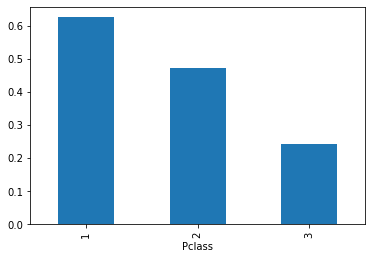

In [12]:
df_cleaned.groupby('Pclass')['Survived'].mean().plot(kind='bar')

In [13]:
df_cleaned.groupby('Sex')['Survived'].mean()

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

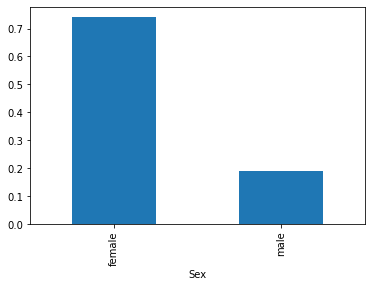

In [14]:
df_cleaned.groupby('Sex')['Survived'].mean().plot(kind='bar')

In [15]:
df_cleaned.groupby(['Pclass', 'Sex'])['Survived'].mean()

Pclass  Sex   
1       female    0.967391
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

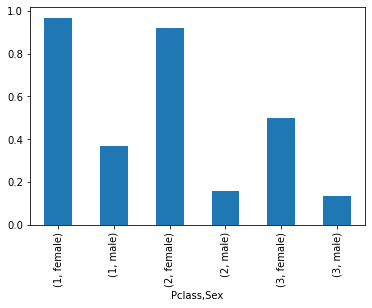

In [16]:
df_cleaned.groupby(['Pclass', 'Sex'])['Survived'].mean().plot(kind='bar')

In [17]:
pd.pivot_table(
    df_cleaned,
    values='Survived',
    index=['Pclass'],
    columns=['Sex'],
    aggfunc=np.mean
)

Sex,female,male
Pclass,,
1,0.967391,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


# Analyse graphique avec seaborn

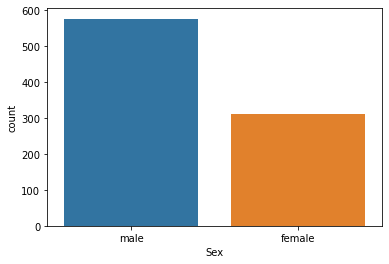

In [18]:
sns.countplot(x='Sex',data=df_cleaned)

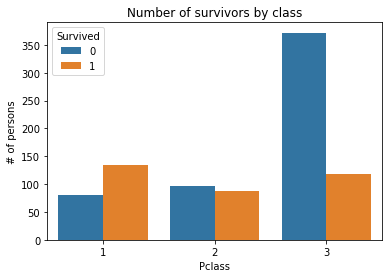

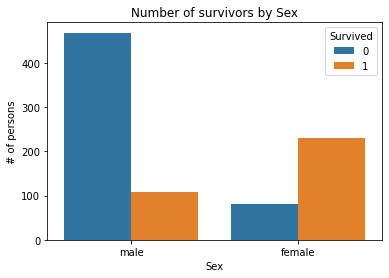

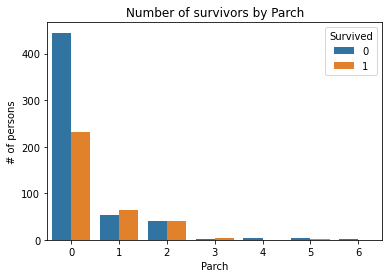

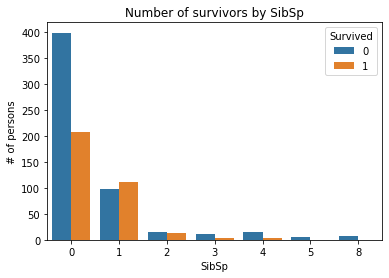

In [19]:
fig = plt.figure() 
sns.countplot(x="Pclass", hue="Survived", data=df_cleaned)
plt.ylabel('# of persons')
plt.title("Number of survivors by class")
plt.legend(loc="upper left", title="Survived")

fig = plt.figure() 
sns.countplot(x="Sex", hue="Survived", data=df_cleaned)
plt.ylabel('# of persons')
plt.title("Number of survivors by Sex")
plt.legend(loc="upper right", title="Survived")

fig = plt.figure() 
sns.countplot(x="Parch", hue="Survived", data=df_cleaned)
plt.ylabel('# of persons')
plt.title("Number of survivors by Parch")
plt.legend(loc="upper right", title="Survived")

fig = plt.figure() 
sns.countplot(x="SibSp", hue="Survived", data=df_cleaned)
plt.ylabel('# of persons')
plt.title("Number of survivors by SibSp")
plt.legend(loc="upper right", title="Survived")

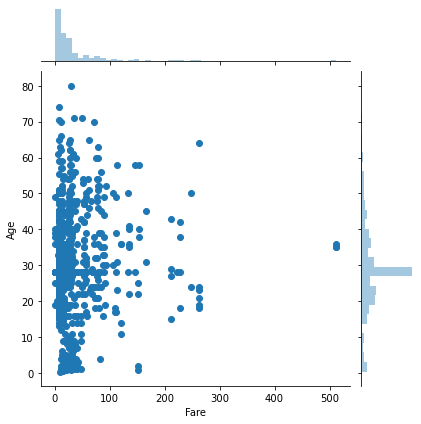

In [20]:
sns.jointplot(x='Fare',y='Age',data=df_cleaned)

## Matrice de corrélation

In [21]:
df_cleaned.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.069822,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.336512,0.081656,0.016824,-0.548193
Age,-0.069822,-0.336512,1.000000,-0.232543,-0.171485,0.093707
SibSp,-0.034040,0.081656,-0.232543,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.171485,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.093707,0.160887,0.217532,1.000000


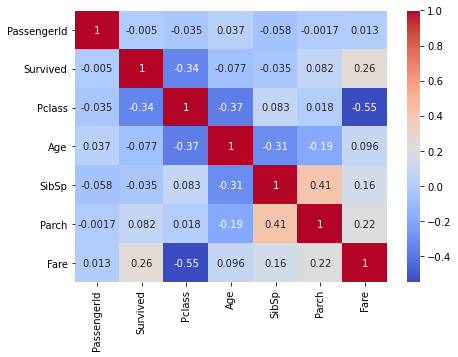

In [22]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, cmap= 'coolwarm');

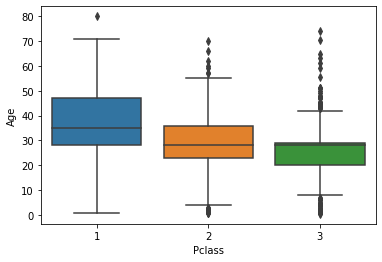

In [23]:
sns.boxplot(x='Pclass',y='Age',data=df_cleaned)


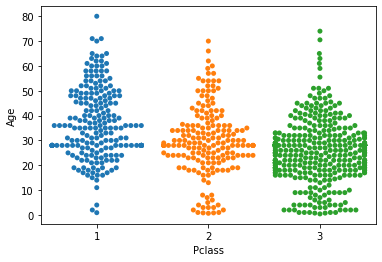

In [24]:
sns.swarmplot(x='Pclass',y='Age',data=df_cleaned)


# Entrainement du modèle

## Préparation des sets d'entraînement et de test

### Un premier modèle ultra simple

In [25]:
df = pd.read_csv("data/titanic/train.csv") 
feature_cols = ['Pclass', 'Parch']
X = df[feature_cols]
y = df.Survived

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Entraînement d'une régression logistique

In [28]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])

In [29]:
logreg

LogisticRegression()

## Prédictions et calcul de la précision

In [30]:
# prédictions de la classe
y_pred_class = logreg.predict(X_test)

In [31]:
# calcul de la précision
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6905829596412556


## Comparaison avec un modèle simpliste

In [32]:
y_train.value_counts()

0    413
1    255
Name: Survived, dtype: int64

In [33]:
y_pred_simpliste = np.zeros(len(y_test))

In [34]:
print(metrics.accuracy_score(y_test, y_pred_simpliste))

0.6098654708520179


# Matrice de confusion

In [35]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[119  17]
 [ 52  35]]


Calcul des différentes valeurs (vrais / faux positifs / négatifs)

In [36]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

In [37]:
print('Vrais Positifs :', TP)
print('Vrais Négatifs :', TN)
print('Faux Positifs :', FP)
print('Faux Négatifs :', FN)

Vrais Positifs : 35
Vrais Négatifs : 119
Faux Positifs : 17
Faux Négatifs : 52


### La sensibilité

Aussi appelée rappel ou taux de vrais positifs

In [38]:
print (TP / float(TP + FN))

0.40229885057471265


### Taux de faux positifs

Ce sont les fausses alarmes.

In [39]:
print (FP / float(FP + TN))

0.125


### Taux de faux négatifs

Les positifs ratés par le modèle.

In [40]:
print (FN / float(TP + FN))

0.5977011494252874


### La spécificité

C'est le taux de vrais négatifs

In [41]:
print (TN / float(TN + FP))

0.875


# Prédire des probabilités d'appartenance à une classe

Calcul des probabilités de survie

In [42]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [43]:
y_pred_prob[:10]

array([0.22148111, 0.62167367, 0.22148111, 0.22148111, 0.62167367,
       0.40607893, 0.22148111, 0.40607893, 0.22148111, 0.22148111])

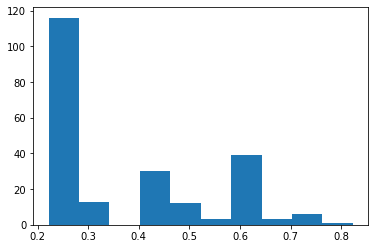

In [44]:
plt.hist(y_pred_prob);

In [45]:
(y_pred_prob > 0.5).astype(int)[:10]

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [46]:
y_pred_class[:10]

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

## Augmenter la sensibilité en abaissant le seuil de prédiction

In [47]:
y_pred_class.sum()

52

In [48]:
y_pred_class = np.where(y_pred_prob > 0.5, 1, 0)
y_pred_class.sum()

52

In [49]:
y_pred_class = np.where(y_pred_prob > 0.3, 1, 0)
y_pred_class.sum()

107

L'ancienne matrice de confusion

In [50]:
print( confusion)

[[119  17]
 [ 52  35]]


Nouvelle matrice de confusion

In [51]:
print (metrics.confusion_matrix(y_test, y_pred_class))

[[82 54]
 [34 53]]


In [52]:
# sensibilité plus basse
print (TP / float(TP + FN))
print (63 / float(63 + 32))

0.40229885057471265
0.6631578947368421


In [53]:
# spécificité plus haute
print( TN / float(TN + FP))
print (72 / float(72 + 56))

0.875
0.5625


## Calcul de la courbe de ROC

In [54]:
from sklearn.metrics import roc_curve, auc
def plot_auc(y_test, y_pred_prob):
    fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(12, 8))
    plt.plot(fpr, tpr, label='AUC: %0.3f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('1-Specificite')
    plt.ylabel('Sensibilite')
    plt.grid(True)
    plt.legend(loc="lower right")

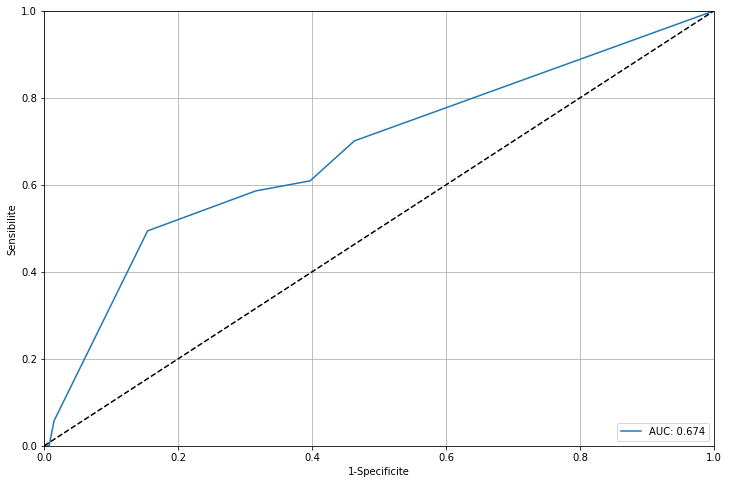

In [55]:
plot_auc(y_test, y_pred_prob)

## Un peu de feature engineering

In [56]:
df = pd.read_csv('data/titanic/train.csv')
df_cleaned = clean_data(df)

Exercice : Remplacer "Sex" par une valeur booléenne avec du dummy encoding dans df_cleaned

In [57]:
sexe = pd.get_dummies(df_cleaned['Sex'], prefix='Sex')

In [58]:
sexe.drop(['Sex_female'], axis=1, inplace=True)
df_cleaned.drop(['Sex'], axis=1, inplace=True)
df_cleaned = pd.concat([df_cleaned, sexe], axis=1)

Exercice :
* écrire une fonction `category_feature_engineer` qui construit les variables dummifiées pour toutes les colonnes catégorielles
* créer une fonction `preprocess_data` qui enchaine les traitements de clean_data et category_feature_engineer
* Réécrire toutes les fonctions de pré-traitement dans la cellule ci dessous
* appliquer la fonction `preprocess_data` sur le dataframe initial pour créer un dataframe `preprocessed_df`

In [59]:
# on réécrit toutes les fonctions de pré-traitement ici
def preprocess_data(df, fill_na_with='median'):
    df = clean_data(df, fill_na_with)
    df = category_feature_engineer(df)
    return df

def clean_data(df, fill_na_with):
    df = df.copy()
    df = filter_columns(df)
    df = manage_nan(df, fill_na_with)
    return df

def filter_columns(df):
    for col in ['Survived', 'PassengerId', 'Name', 'Cabin', 'Ticket']:
        try:
            df.drop(col, axis=1, inplace=True)
        except KeyError:
            pass
    return df

def manage_nan(df, fill_na_with):
    if fill_na_with == 'median':
        df['Age'] = df['Age'].fillna(df['Age'].median())
    elif fill_na_with == 'mean':
        df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Embarked'] = df['Embarked'].fillna('S')
    return df

def category_feature_engineer(df):
    cat = pd.get_dummies(df[['Sex', 'Embarked']])
    df = pd.concat([df, cat], axis=1)
    df.drop(['Sex', 'Embarked'], axis=1, inplace=True)
    return df

In [60]:
df = pd.read_csv('data/titanic/train.csv')
preprocessed_df = preprocess_data(df)

In [61]:
preprocessed_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


## Comment contruire une nouvelle colonne à partir d'une colonne existante ? 

In [62]:
# Fonction à appliquer sur le dataframe
def add_name_length_to_df(df):
    # On applique la fonction 'len' sur toutes les lignes de la colonne 'Name'
    df['NameLength'] = df['Name'].apply(len)
    return df

def add_age_category(df):
    # On applique la fonction 'to_category' sur toutes les lignes de la colonne 'Age'
    df['Age_cat'] = df['Age'].apply(to_category)
    return df

# Fonction à appliquer sur un champ numérique
def to_category(age):
    if age < 5:
        return 'baby'
    elif age < 15:
        return 'child'
    elif age < 40:
        return 'young'
    elif age < 60:
        return 'a_little_less_young'
    else:
        return 'senior'


### Construction des fonctions de calcul de score
On construit ces fonctions pour pouvoir évaluer facilement nos différents modèles par la suite

Exercice :
* Ecrire une fonction `plot_auc` qui affiche la courbe ROC avec l'auc associé
* ecrire une fonction `classification_summary` qui affiche la matrice de confusion et le résumé des scores de classification

In [70]:
from sklearn.metrics import roc_curve, classification_report
def plot_auc(y_test, y_pred_prob):
    fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(12, 8))
    plt.plot(fpr, tpr, label='AUC: %0.3f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('1-Specificite')
    plt.ylabel('Sensibilite')
    plt.grid(True)
    plt.legend(loc="lower right")

In [72]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.71      0.60      0.65       136
           1       0.50      0.61      0.55        87

    accuracy                           0.61       223
   macro avg       0.60      0.61      0.60       223
weighted avg       0.62      0.61      0.61       223



## Nouvelle régression logistique avec toutes les features

* Charger les données et appliquer la fonction de preprocessing pour créer les jeux de données X_train, X_test, y_train, y_test

In [ ]:

def create_train_test():
    df = pd.read_csv('data/titanic/train.csv')
    X = df.drop('Survived', axis=1)
    y = df['Survived']
    X_train, X_test = train_test_split(X)
    
    X_train = preprocess_data(X_train)
    X_test = preprocess_data(X_test)
    
    y_train = y.loc[X_train.index]
    y_test = y.loc[X_test.index]
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = create_train_test()

Créee une régression logistique l'entrainer sur ces données préprocessées

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:,1]

### Interprétation des coefficients
On peut regarder le poids de chaque coefficient de la régression, ce qui donne une mesure de l'importance de la variable.

In [ ]:
list(zip(X_train.columns, logreg.coef_[0]))

In [ ]:
classification_summary(y_test, y_pred)

In [ ]:
plot_auc(y_test, y_pred_prob)

## Un autre modèle : la random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

### Avec les paramètres par défaut
* appliquer le même pipeline de prétraitement des données, mais avec un modèle différent.
* Quel score obtient-t-on en auc ? 

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]


In [ ]:
plot_auc(y_test, y_pred_prob)

### En changeant les paramètres
* Essayer d'autres paramètres pour la forêt aléatoire 
* Arrivez-vous à augmenter le score ? Avec quels paramètres ? 

In [ ]:
clf = RandomForestClassifier(
    n_estimators=50,
    criterion='entropy'
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]

In [ ]:
plot_auc(y_test, y_pred_prob)

## Optimisation des hyper-paramètres 

In [ ]:
# Le grid search va nous permettre de tester un grand nombre de combinaisons de paramètres, afin de trouver
# celle qui donne les meilleurs résultats par validation croisée
from sklearn.model_selection import GridSearchCV
params_rf = {
    'n_estimators': [50, 100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 50, 100]
}
X_train, X_test, y_train, y_test = create_train_test()
rf = RandomForestClassifier()

clf = GridSearchCV(rf, params_rf, n_jobs=-1)  # n_jobs=-1 pour utiliser tous les processeurs
# On entraine le gridsearch comme un modèle, avec la méthode 'fit'
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]
plot_auc(y_test, y_pred_prob)

In [ ]:
metrics.accuracy_score(y_test, y_pred)

In [ ]:
# clf.best_estimator_ contient le meilleur modèle trouvé par le gridsearch. 
# clf.best_estimator_.feature_importances_ contient un score mesurant à quel point la feature a été 
# utilisée par le random forest pour faire des prédictions.
list(zip(X_train.columns, clf.best_estimator_.feature_importances_))

#### Exercice:
* Essayer avec d'autres valeurs pour la grille de paramètres
* Essayer avec un gridsearch sur un autre modèle de votre choix (cf documentation sklearn)
* Quel score (auc) arrivez vous à obtenir ? 

## Tout mettre ensemble : les pipelines !

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
# Les pipelines sont des objets permettant d'enchainer séquentiellement des étapes de traitement de données.
# Un pipeline sklearn contient un nombre illimité de transformers, et un unique modèle prédictif, à la fin du pipeline.
# Les transformers sont des classes qui doivent hériter de la classe TransformerMixin de sklearn, 
# et implémenter les méthodes 'fit' et 'transform'

# On créé un transformer qui applique le cleaning et la création de nouvelles variables 
class Preprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, fill_na_with='median'):
        # Le processor sera initialisé avec des paramètres (ici on a 1 paramètre)
        # Ces paramètres pourront être optimisés par la suite avec un gridsearch sur le pipeline.
        self.fill_na_with = fill_na_with
        
    def transform(self, X, y=None):
        X_preprocessed = preprocess_data(X, self.fill_na_with)
        return X_preprocessed
    
    def fit(self, X, y=None):
        return self

# Note : ici on appelle la fonction 'preprocess_data' que l'on a construite plus haut. 
# Pour faire les choses proprement, il faudrait intégrer la fonction 'preprocess_data'
# dans les méthodes de la classe Preprocessor


In [ ]:
df = pd.read_csv('data/titanic/train.csv')
preprocessor = Preprocessor()

# On applique le preprocessor sur le dataframe initial !
X_transformed = preprocessor.transform(df)

In [ ]:
X_transformed.head()

In [ ]:
# On créé un pipeline avec notre class de preprocessing et un modèle randomforest
pipe = Pipeline(
    [
        ('preprocess', Preprocessor()),
        ('rf', RandomForestClassifier())
    ]
)

In [ ]:
# Le pipeline s'entraine sur le jeu d'entrainement 
df = pd.read_csv('data/titanic/train.csv')
X_train, X_test, y_train, y_test = train_test_split(df, df.Survived)
pipe.fit(X_train, y_train)

In [ ]:
y_pred = pipe.predict(X_test)
y_pred_prob = pipe.predict_proba(X_test)[:,1]

In [ ]:
# On peut entrainer un grid search sur le pipeline, en jouant sur tous les paramètres :paramètre du modèle
# mais aussi paramètre des étapes de prétraitement. Pour cela, on fait préfixer le nom du paramètre par
# '{nom de l'etape}__'. Par exemple, l'étape 'preprocess' possède un paramètre 'fill_na_with' donc on écrit:
# preprocess__fill_na_with pour le paramètre de cette étape.
pipeline_params = {
    'preprocess__fill_na_with': ['mean', 'median'],
    'rf__n_estimators': [50, 100],
    'rf__criterion': ['gini', 'entropy'],
    'rf__max_depth': [None, 10, 50]
}
pipe = Pipeline(
    [
        ('preprocess', Preprocessor()),
        ('rf', RandomForestClassifier())
    ]
)
grid = GridSearchCV(pipe, pipeline_params)
grid.fit(X_train, y_train)

In [ ]:
y_pred = grid.predict(X_test)
y_pred_prob = grid.predict_proba(X_test)[:,1]

In [ ]:
plot_auc(y_test, y_pred_prob)